# Factor Analysis on K-Medoid clusters

## Factor Analysis on 5th cluster

In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns
import matplotlib.pyplot as plt

#First the unnecessary columns are removed:

df = pd.read_excel('Asansol MRBQ Data.xlsx')
df = df.drop(columns = ['TOT2'])

df_2 = pd.read_excel('clustered data KMedoids.xlsx')

clusters = list(df_2['Cluster'])

df['Cluster'] = clusters
df

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
0,6,5,6,3,6,7,7,1,6,6,...,2,1,6,2,2,6,7,2,4,2
1,4,4,3,2,2,5,2,1,1,3,...,1,4,3,4,3,4,3,3,3,1
2,6,7,6,5,3,4,1,1,4,1,...,1,5,5,1,6,6,1,6,6,4
3,1,1,2,6,2,1,1,1,2,1,...,2,2,1,1,1,2,1,2,2,2
4,4,7,4,6,6,4,4,3,3,3,...,7,1,7,1,3,1,3,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5,1,5,3,5,3,1,1,5,2,...,1,5,2,1,5,3,1,3,3,4
477,6,7,5,5,6,5,1,1,5,1,...,1,6,2,1,5,1,1,2,2,4
478,2,4,3,3,6,2,1,1,4,2,...,1,5,2,1,2,2,1,1,1,0
479,5,7,5,5,7,3,2,1,5,1,...,2,6,2,1,5,2,1,3,2,1


In [2]:
# Only the rows belionging to the 5th cluster are filtered out.

cluster_5 = df.loc[df['Cluster']==4]
cluster_5

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
2,6,7,6,5,3,4,1,1,4,1,...,1,5,5,1,6,6,1,6,6,4
9,2,3,5,6,5,4,2,6,2,3,...,4,5,5,6,5,2,2,2,3,4
11,1,2,1,7,1,7,5,1,1,1,...,1,1,1,2,2,2,1,2,3,4
21,6,4,4,6,2,6,3,4,5,5,...,3,5,5,6,3,5,3,4,4,4
25,4,3,3,6,4,4,3,4,5,5,...,5,6,3,6,6,3,5,7,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,7,7,6,6,4,3,3,1,3,1,...,1,7,3,1,6,1,1,3,3,4
474,6,1,2,3,5,2,1,1,5,1,...,1,4,2,1,4,3,1,2,2,4
475,6,7,1,1,6,1,1,1,6,1,...,1,5,3,1,4,4,1,3,3,4
476,5,1,5,3,5,3,1,1,5,2,...,1,5,2,1,5,3,1,3,3,4


In [4]:
cluster_5 = cluster_5.drop(columns=['Cluster'])
cluster_5

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
2,6,7,6,5,3,4,1,1,4,1,...,5,1,5,5,1,6,6,1,6,6
9,2,3,5,6,5,4,2,6,2,3,...,6,4,5,5,6,5,2,2,2,3
11,1,2,1,7,1,7,5,1,1,1,...,7,1,1,1,2,2,2,1,2,3
21,6,4,4,6,2,6,3,4,5,5,...,5,3,5,5,6,3,5,3,4,4
25,4,3,3,6,4,4,3,4,5,5,...,6,5,6,3,6,6,3,5,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,7,7,6,6,4,3,3,1,3,1,...,5,1,7,3,1,6,1,1,3,3
474,6,1,2,3,5,2,1,1,5,1,...,4,1,4,2,1,4,3,1,2,2
475,6,7,1,1,6,1,1,1,6,1,...,6,1,5,3,1,4,4,1,3,3
476,5,1,5,3,5,3,1,1,5,2,...,5,1,5,2,1,5,3,1,3,3


In [5]:
# Next the KMO (Kiaser-Meyer-Olkin) test was used to determine whether the cluster is suitable for factor analysis
# The closer the overall KMO is to 1, the better suited the dataset.

kmo_all, kmo_model = calculate_kmo(cluster_5)

print("KMO per variable:", kmo_all)
print("Overall KMO:", kmo_model)

# Since the cluster has a reasonable KMO value, going ahead with the Factor Analysis

KMO per variable: [0.8753624  0.71022385 0.93372181 0.85828974 0.85034883 0.86167122
 0.88889427 0.91029094 0.89244858 0.86228494 0.63324518 0.60895361
 0.90776095 0.82460758 0.79200947 0.9073914  0.9015926  0.89589254
 0.83896281 0.7610136  0.91539386 0.88522506 0.88711132 0.82239618
 0.7937945  0.80342156 0.8742284  0.90747866 0.8272541  0.8778996
 0.88076142 0.89549342 0.85383294 0.90660564 0.80319907 0.82362279]
Overall KMO: 0.8622989636604216


In [6]:
# The original correlation matrix for the third cluster:
cluster_5.corr()

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
Q 1,1.000000,0.549596,0.455565,0.430469,0.661759,0.204717,-0.099678,-0.200118,0.580848,-0.069881,...,0.514901,-0.172580,0.706379,0.181452,-0.160434,0.606780,0.225443,-0.100133,0.351244,0.313080
Q 2,0.549596,1.000000,0.317573,0.238204,0.545300,0.228705,0.019986,-0.134238,0.262989,-0.113943,...,0.205570,-0.129923,0.550601,0.110339,-0.134234,0.266028,-0.047341,-0.097992,0.164994,0.176416
Q 3,0.455565,0.317573,1.000000,0.792832,0.524963,0.736146,0.364779,0.252652,0.431952,0.306397,...,0.415121,0.255846,0.505488,0.509330,0.372167,0.606943,0.475279,0.297167,0.501885,0.543733
Q 4,0.430469,0.238204,0.792832,1.000000,0.400708,0.758694,0.474953,0.282873,0.340266,0.304449,...,0.374682,0.331698,0.406586,0.447028,0.388240,0.571392,0.422799,0.303419,0.467918,0.455045
Q 5,0.661759,0.545300,0.524963,0.400708,1.000000,0.318334,-0.011559,-0.096733,0.586682,0.031859,...,0.487347,-0.069026,0.756054,0.181720,-0.052887,0.539596,0.195562,-0.057710,0.256214,0.284927
Q 6,0.204717,0.228705,0.736146,0.758694,0.318334,1.000000,0.550445,0.376906,0.242402,0.506419,...,0.320262,0.396051,0.278704,0.460704,0.553147,0.413676,0.413179,0.442916,0.418414,0.478940
Q 7,-0.099678,0.019986,0.364779,0.474953,-0.011559,0.550445,1.000000,0.630134,0.021620,0.436633,...,-0.002610,0.573789,-0.186565,0.473245,0.619036,0.076680,0.421652,0.571728,0.297134,0.275859
Q 8,-0.200118,-0.134238,0.252652,0.282873,-0.096733,0.376906,0.630134,1.000000,-0.007126,0.605115,...,-0.012610,0.728812,-0.181167,0.520657,0.666529,0.118412,0.419423,0.668646,0.282779,0.302398
Q 9,0.580848,0.262989,0.431952,0.340266,0.586682,0.242402,0.021620,-0.007126,1.000000,0.147352,...,0.504755,0.037797,0.539855,0.284533,0.094327,0.526853,0.393403,-0.004165,0.405021,0.360979
Q 10,-0.069881,-0.113943,0.306397,0.304449,0.031859,0.506419,0.436633,0.605115,0.147352,1.000000,...,-0.015188,0.579217,0.007247,0.357953,0.638239,0.135948,0.441113,0.527677,0.416696,0.394537


In [8]:
# The eigenvalues are calculated for the third cluster

fa_1 = FactorAnalyzer(n_factors=3, rotation='oblimin').fit(cluster_5)
fa_1.loadings_

eigenvalues, _ = fa_1.get_eigenvalues()
eigen_values = list(eigenvalues)

data_ev = pd.DataFrame(eigen_values,columns=['Eigenvalues'])

data_ev

# In this case, since the first 7 eigenvalues are greater than 1, the no. of factors is take to be 7.

,Eigenvalues
0,11.622003
1,7.266139
2,1.990538
3,1.758093
4,1.429721
5,1.245185
6,1.065921
7,0.996036
8,0.877576
9,0.711040


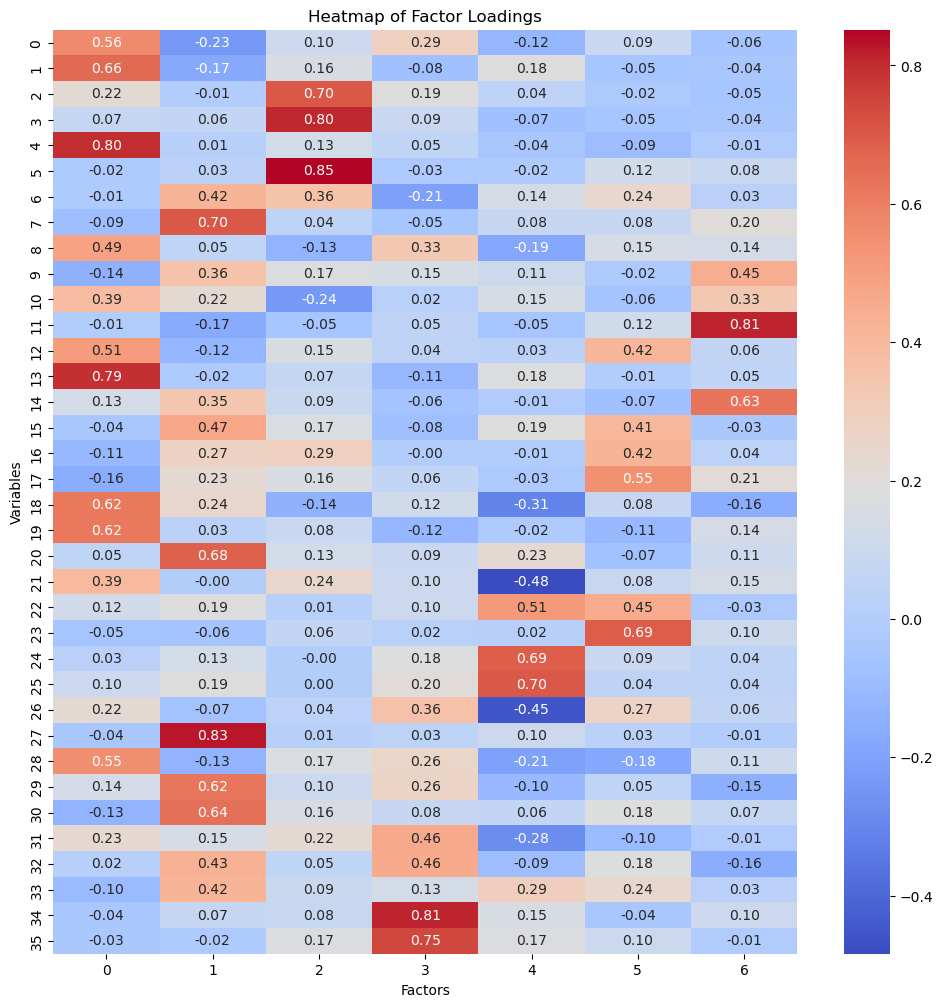

In [9]:
# The factor loadings for the 7 Factors are presented in the form of a heatmap:

fa_2 = FactorAnalyzer(n_factors=7, rotation='oblimin').fit(cluster_5)
loadings = fa_2.loadings_

plt.figure(figsize=(12, 12)) 
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

In [10]:
corr_mat_factors_5 = pd.DataFrame(fa_2.phi_)
corr_mat_factors_5

# The correlation matrix between the 7 Factors themselves:

,0,1,2,3,4,5,6
0,1.000000,-0.074657,0.216908,0.377905,0.301032,0.410532,0.402661
1,-0.074657,1.000000,0.090221,-0.255720,0.393148,-0.020930,0.340310
2,0.216908,0.090221,1.000000,0.104705,0.078038,0.178342,0.223915
3,0.377905,-0.255720,0.104705,1.000000,-0.061454,0.180937,0.059020
4,0.301032,0.393148,0.078038,-0.061454,1.000000,0.256808,0.423330
5,0.410532,-0.020930,0.178342,0.180937,0.256808,1.000000,0.379578
6,0.402661,0.340310,0.223915,0.059020,0.423330,0.379578,1.000000


In [11]:
# Exporting to Excel

corr_mat_factors_5.to_excel('FA5_KMedoids.xlsx')